In [80]:
pip install dash

Note: you may need to restart the kernel to use updated packages.


In [81]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [89]:
# importing required libraries 
import dash 
import dash_core_components as dcc     
import dash_html_components as html 

In [123]:
solar_capability = pd.read_csv("installed-solar-pv-capacity.csv")
solar_consumtion = pd.read_csv("solar-energy-consumption.csv")

In [283]:
solar_capability = solar_capability.rename(columns={'Solar energy capacity - GW': 'capability_gw'})
solar_capability = solar_capability.loc[solar_capability['Entity'].isin(["Vietnam", "Australia", "Japan", "Singapore"])] ## FILTER
solar_capability


,Entity,Code,Year,capability_gw
262,Australia,AUS,2000,0.025000
263,Australia,AUS,2001,0.029000
264,Australia,AUS,2002,0.034000
265,Australia,AUS,2003,0.039400
266,Australia,AUS,2004,0.046400
...,...,...,...,...
4197,Vietnam,VNM,2018,0.104992
4198,Vietnam,VNM,2019,4.993491
4199,Vietnam,VNM,2020,16.660492
4200,Vietnam,VNM,2021,16.660492


In [358]:
# rename column
solar_consumtion = solar_consumtion.rename(columns={'Electricity from solar - TWh': 'from_solar_twh'})  
# select data
solar_consumtion = solar_consumtion.loc[solar_consumtion['Entity'].isin(["Vietnam", "Australia", "Japan", "Singapore"])] ## FILTER
solar_consumtion

environment_concern = pd.read_csv("environmental_concerns.xls")
environment_concern


,Statement,Percentage,Country
0,Concerned about Climate change,87,Japan
1,Not Concerned about Climate change,13,Japan
2,Concerned about air pollution,79,Vietnam
3,Concerned about water pollution,71,Vietnam
4,Concerned about Climate change,83,Austraila
5,Not Concerned about Climate change,17,Austraila


## Public sentiment

In [175]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.1 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [176]:
  from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    #note: depending on how you installed (e.g., using source code download versus pip install), you may need to import like this:
    #from vaderSentiment import SentimentIntensityAnalyzer

# --- examples -------
sentences = ["VADER is smart, handsome, and funny.",  # positive sentence example
             "VADER is smart, handsome, and funny!",  # punctuation emphasis handled correctly (sentiment intensity adjusted)
             "VADER is very smart, handsome, and funny.", # booster words handled correctly (sentiment intensity adjusted)
             "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
             "VADER is VERY SMART, handsome, and FUNNY!!!", # combination of signals - VADER appropriately adjusts intensity
             "VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!", # booster words & punctuation make this close to ceiling for score
             "VADER is not smart, handsome, nor funny.",  # negation sentence example
             "The book was good.",  # positive sentence
             "At least it isn't a horrible book.",  # negated negative sentence with contraction
             "The book was only kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
             "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
             "Today SUX!",  # negative slang with capitalization emphasis
             "Today only kinda sux! But I'll get by, lol", # mixed sentiment example with slang and constrastive conjunction "but"
             "Make sure you :) or :D today!",  # emoticons handled
             "Catch utf-8 emoji such as such as 💘 and 💋 and 😁",  # emojis handled
             "Not bad at all"  # Capitalized negation
             ]

analyzer = SentimentIntensityAnalyzer()
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))

VADER is smart, handsome, and funny.----------------------------- {'neg': 0.0, 'neu': 0.254, 'pos': 0.746, 'compound': 0.8316}
VADER is smart, handsome, and funny!----------------------------- {'neg': 0.0, 'neu': 0.248, 'pos': 0.752, 'compound': 0.8439}
VADER is very smart, handsome, and funny.------------------------ {'neg': 0.0, 'neu': 0.299, 'pos': 0.701, 'compound': 0.8545}
VADER is VERY SMART, handsome, and FUNNY.------------------------ {'neg': 0.0, 'neu': 0.246, 'pos': 0.754, 'compound': 0.9227}
VADER is VERY SMART, handsome, and FUNNY!!!---------------------- {'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.9342}
VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!--------- {'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'compound': 0.9469}
VADER is not smart, handsome, nor funny.------------------------- {'neg': 0.646, 'neu': 0.354, 'pos': 0.0, 'compound': -0.7424}
The book was good.----------------------------------------------- {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'co

In [179]:
sentiment_dataset = pd.read_excel("sentiment.xlsx")
sentiment_dataset.head()

,ID,post_id,time,text,likes,comments,shares,sentiment
0,0,1924048097753160,2021-05-31 16:00:46,We’ve hit a Sydney Metro - NSW GOV milestone: ...,11,1,0,0.000000
1,1,1921019011389402,2021-05-27 12:20:00,Construction safety standards have certainly i...,35,7,0,-0.137383
2,2,1920457328112237,2021-05-27 08:30:00,We’re proud to support National Reconciliation...,17,0,0,0.000000
3,3,1920274138130556,2021-05-26 12:14:56,You can now access Street View imagery of the ...,17,0,0,0.000000
4,4,1918717961619507,2021-05-24 12:30:09,✅ Parramatta ↔️ CBD: 20 minutes\n✅ Blacktown ↔...,49,4,0,0.000000


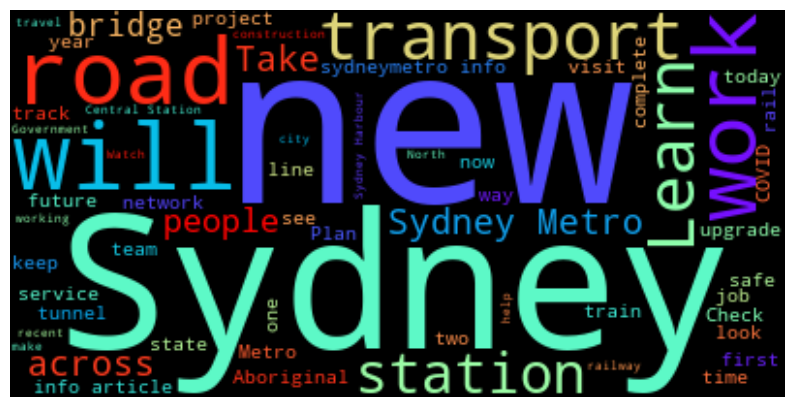

In [186]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


# merge all texts in posts
post_text = ' '.join(sentiment_dataset['text'])
post_text = post_text.replace('\n', '') # remove blank lines characters

# update stopwords
stopwords = set(STOPWORDS)
stopwords.update(['https', 'gov', 'au', 'nsw', 's', 're'])

# Generate a word cloud image
wordcloud = WordCloud(random_state=1, 
                      collocations=True, 
                      stopwords=stopwords,
                      max_words=60,
                      background_color='black',
                      colormap ='rainbow',
                      contour_color='steelblue').generate(post_text)

# Function to display word cloud img via matplotlib
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

# plot world cloud    
plot_cloud(wordcloud)

In [306]:



app = dash.Dash() 

app.layout = html.Div(children =[ 
	html.H1("Dash Tutorial"), 
	dcc.Graph( 
		id ="example", 
		figure ={ 
			'data':[ 
					   {'x': solar_consumtion.Code,
						'y': solar_consumtion.from_solar_twh, 
						'type':'bar', 
						'name':'Consumtion',
                        'marker_color' : "red"}, 
    				   {'x': solar_capability.Code,
    					'y':solar_capability.capability_gw, 
    					'type':'bar', 
    					'name':'Capacity'} 
				], 
			'layout':{ 
				'title': "Solar Consumption and Capacity"
			} 
		} 
	) 
]) 


if __name__ == '__main__': 
	app.run_server() 




In [193]:
pip install dash-bootstrap-components


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 742.0 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [340]:
pip install dash dash-bootstrap-components plotly


Note: you may need to restart the kernel to use updated packages.


In [372]:
# import dash
# import dash_bootstrap_components as dbc ## USE BOOSTRAP COMPONENTS

# import plotly.express as px
# import plotly.graph_objs as go

import dash
import dash_bootstrap_components as dbc
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go
from dash.dependencies import Input, Output



app = dash.Dash(external_stylesheets=[dbc.themes.BOOTSTRAP]) ## ENABLE DASH APPLIATION TO BOOSTRAP 



# Load the sample Gapminder dataset and filter it for Oceania
# df = px.data.gapminder().query("continent == 'Oceania'")

# Create a line chart using Plotly Express
fig = px.line(solar_capability, x='Year', y='capability_gw', color='Code', markers=True,
              title="Life Expectancy Over Time in Oceania")

fig2 = go.Figure(data=[go.Scatter(
    x=[1, 2, 3, 4], y=[10, 11, 12, 13],
    mode='markers',
    marker_size=[40, 60, 80, 100])
])

fig3 = px.scatter(environment_concern, x="Percentage", y="Percentage",
	         size="Percentage", color="Country",
                 hover_name="Statement", log_x=True, size_max=60)





app.layout = dbc.Container(
    [
      dbc.Row(
            dbc.Col(
                dcc.Graph(
                    id='line-chart',
                    figure=fig
                ),
                style = { 
                    "border" : "solid #808080 1px", 
                    "outline": "none",
                    "margin": "7px 7px 7px 7px"
                }
            )
        ),
      dbc.Row(
            dbc.Col(
                dcc.Graph(
                    id='bubble',
                    figure=fig3
                ),
                style = { 
                    "border" : "solid #808080 1px", 
                    "outline": "none",
                    "margin": "7px 7px 7px 7px"
                }
            )
        ),
dbc.Row(
    dbc.Col(	
            dcc.Graph( 
                id ="example1",  ## ID HAS NOT BE DIFFENT WITH OTHER COMPONET (CAN NOT DUPLICATED)
                figure ={ 
                    'data':[ 
                        {'x': solar_consumtion.Code,
                         'y': solar_consumtion.from_solar_twh, 
                         'type':'bar', 
                         'name':'Consumtion',
                         'marker_color' : "red"}, 
                        {'x': solar_capability.Code,
                         'y':solar_capability.capability_gw, 
                         'type':'bar', 
                         'name':'Capacity'} 
                    ], 
                    'layout':{ 
                            'title': "Solar Consumption and Capacity"
                    },
                } 
            ),
            style = { 
                "border" : "solid #808080 1px", 
                "outline": "none",
                "margin": "7px 7px 7px 7px"
            }
    )
),

dbc.Row(
		[
		dbc.Col(	
			dcc.Graph( 
				id ="example2", 
					figure ={ 
						'data':[ 
							{'x': solar_consumtion.Code,
							'y': solar_consumtion.from_solar_twh, 
								'type':'bar', 
								'name':'Consumtion',
							'marker_color' : "red"}, 
							{'x': solar_capability.Code,
							'y':solar_capability.capability_gw, 
								'type':'bar', 
								'name':'Capacity'} 
						], 
						'layout':{ 
						'title': "Solar Consumption and Capacity"
						} 
					} 
			),
            style = { 
                "border" : "solid #808080 1px", 
                "outline": "none",
                "margin": "7px 7px 7px 7px"
            }
		),
		dbc.Col(	
			dcc.Graph( 
				id ="example3", 
					figure ={ 
						'data':[ 
							{'x': solar_consumtion.Code,
							'y': solar_consumtion.from_solar_twh, 
								'type':'bar', 
								'name':'Consumtion',
							'marker_color' : "red"}, 
							{'x': solar_capability.Code,
							'y':solar_capability.capability_gw, 
								'type':'bar', 
								'name':'Capacity'} 
						], 
						'layout':{ 
						'title': "Solar Consumption and Capacity"
						} 
					} 
			),
            style = { 
                "border" : "solid #808080 1px", 
                "outline": "none",
                "margin": "7px 7px 7px 7px"
            }
		),
		
		dbc.Col(html.Div("One of three columns")),
		]
)
    ]
)

if __name__ == "__main__":
    app.run_server()

In [284]:
solar_capability

,Entity,Code,Year,capability_gw
262,Australia,AUS,2000,0.025000
263,Australia,AUS,2001,0.029000
264,Australia,AUS,2002,0.034000
265,Australia,AUS,2003,0.039400
266,Australia,AUS,2004,0.046400
...,...,...,...,...
4197,Vietnam,VNM,2018,0.104992
4198,Vietnam,VNM,2019,4.993491
4199,Vietnam,VNM,2020,16.660492
4200,Vietnam,VNM,2021,16.660492


In [355]:
environment_concern = pd.read_csv("environmental_concerns.xls")
environment_concern


,Statement,Percentage,Country
0,Concerned about Climate change,87,Japan
1,Not Concerned about Climate change,13,Japan
2,Concerned about air pollution,79,Vietnam
3,Concerned about water pollution,71,Vietnam
4,Concerned about Climate change,83,Austraila
5,Not Concerned about Climate change,17,Austraila


In [369]:
import plotly.express as px

df = px.data.medals_wide(indexed=True)
df
# fig = px.imshow(df)
# fig.show()

medal,gold,silver,bronze
nation,,,
South Korea,24,13,11
China,10,15,8
Canada,9,12,12


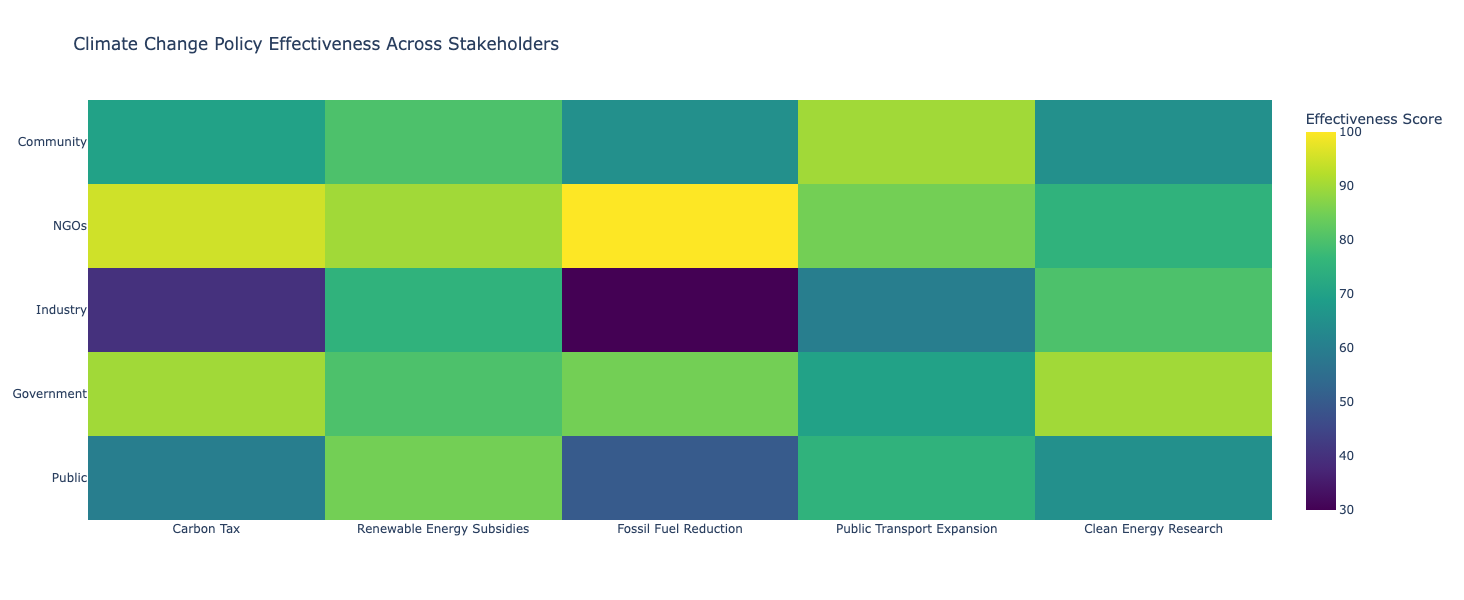

In [371]:
import plotly.graph_objects as go

# Data from the table
policies = ['Carbon Tax', 'Renewable Energy Subsidies', 'Fossil Fuel Reduction', 'Public Transport Expansion', 'Clean Energy Research']
stakeholders = ['Public', 'Government', 'Industry', 'NGOs', 'Community']

scores = [
    [60, 85, 50, 75, 65],  # Public
    [90, 80, 85, 70, 90],  # Government
    [40, 75, 30, 60, 80],  # Industry
    [95, 90, 100, 85, 75], # NGOs
    [70, 80, 65, 90, 65]   # Community
]

# Creating Heatmap
heatmap = go.Figure(data=go.Heatmap(
    z=scores,
    x=policies,
    y=stakeholders,
    colorscale='Viridis',  # Or any other colorscale you'd prefer
    colorbar=dict(title='Effectiveness Score')
))

# Customize layout
heatmap.update_layout(
    title='Climate Change Policy Effectiveness Across Stakeholders',
    xaxis_nticks=36,
    yaxis_nticks=5,
    height=600,
    width=800
)

# Show heatmap
heatmap.show()
